In [2]:
import pandas
from collections import Counter
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy
from sklearn.linear_model import LinearRegression

# <p style="font-size:200%">INFO 2950 FINAL PROJECT</p>


<p style="font-size:200%">Airbnb Listings & Ice Cream Store Data Comparison Case Study</p>

# DATASET

In [3]:
data = pandas.read_csv("icecream_airbnb.csv")
data.head()

,listing,Van Leeuwen,Gelateria Gentile,OddFellows,Ample Hills,Emack & Bolio's,average,min,max,price per night,room type,super host status,instant book feature,host-listings count,latitude,longitude,review scores rating,accomodates,cancellation
0,15241517,6.9,9.2,9.3,6.5,7.5,7.88,6.5,9.3,70,Private room,y,n,1,40.600950,-73.996840,100.0,3,flexible
1,16314419,3.8,3.1,3.2,3.8,4.1,3.60,3.1,4.1,25,Shared room,n,n,2,40.689374,-73.922600,87.0,1,moderate
2,18331847,5.3,8.4,8.6,4.8,5.9,6.60,4.8,8.6,61,Entire home/apt,n,n,1,40.625436,-74.034946,NaN,2,moderate
3,5481762,2.1,2.3,2.5,2.1,2.3,2.26,2.1,2.5,159,Entire home/apt,y,y,2,40.686848,-73.955261,94.0,4,strict
4,16163874,3.3,3.3,3.4,3.3,3.6,3.38,3.3,3.6,150,Entire home/apt,y,y,1,40.682485,-73.932340,100.0,4,flexible


In [4]:
data2 = pandas.read_csv("icecream_data.csv")
data2.head()

,Ice cream Store,longitude,latitude,average,min,max
0,Van Leeuwen,-73.990178,40.686983,3.075756,0.036,8.6
1,Gelateria Gentile,-73.963776,40.716428,3.527778,1.800,10.5
2,OddFellows,-73.963746,40.718174,3.657222,2.000,10.7
3,Ample Hills,-73.987221,40.679077,3.025556,0.500,8.0
4,Emack & Bolio's,-73.994817,40.695417,3.403611,0.050,9.2


# Brooklyn Scatter Plot - indicating airbnb listing & ice cream store locations

Based off of problem set 9, we used the assumptions that UPS density would be a fairly accurate measure of population density; therefore, we collected locations of Brooklyn UPS facilities. We wanted to graph these UPS facilities with airbnb listing locations as well as the ice cream store locations to visually depict Brooklyn as a whole.

In [5]:
data_ups_gps = pandas.read_csv("brooklyn_ups_facilities.csv").GeoLocation
data_ups_gps.head()


0    GeoPosition[{40.635517, -73.994919}]
1      GeoPosition[{40.6269, -73.976468}]
2    GeoPosition[{40.612409, -73.925681}]
3    GeoPosition[{40.576311, -73.968805}]
4     GeoPosition[{40.618862, -73.92868}]
Name: GeoLocation, dtype: object

In [6]:
coord_pairs = []
for entry in data_ups_gps:
    x = re.findall("\{(.*)\}", entry)[0].split(',')
    tuple = ((float(x[0]), float(x[1])))
    coord_pairs.append(tuple)
print(coord_pairs[:10])

[(40.635517, -73.994919), (40.6269, -73.976468), (40.612409, -73.925681), (40.576311, -73.968805), (40.618862, -73.92868), (40.698931, -73.916864), (40.650878, -73.869243), (40.632703, -73.88865), (40.702832, -73.989645), (40.618445, -74.033144)]


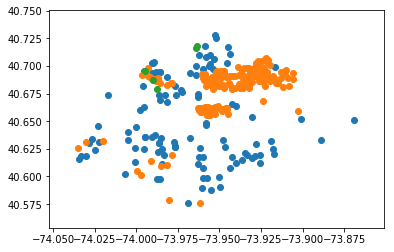

In [7]:
#brooklyn ups locations - blue
lat = [ups_x[1] for ups_x in coord_pairs]
long = [ups_x[0] for ups_x in coord_pairs]
plt.scatter(lat, long)

#brooklyn airbnb listings - orange
plt.scatter(data["longitude"], data["latitude"])

#brooklyn top 5 icecream stores - green
plt.scatter(data2["longitude"], data2["latitude"])


plt.show()


This graph roughly displays the map of Brooklyn. In the graph, the blue dots are UPS locations, the orange dots are airbnb listing locations and the green dots are the top five ice cream store locations.

# Airbnb Listing Price Per Night & Average Distance to Top Ice Cream Store

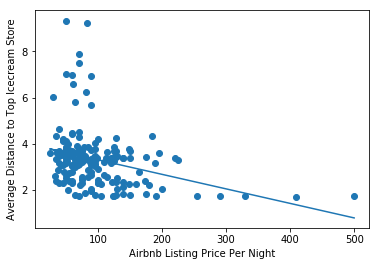

Y-intercept: 3.934779193124311
Coefficient: -0.0062982560249985955


In [17]:
x = data["price per night"]

#average stands for average distance to ice cream store
y = data["average"]
plt.scatter(x,y)

def line_of_best_fit(x,y):
    m = (((numpy.mean(x)*numpy.mean(y))-numpy.mean(x*y))/((numpy.mean(x)*numpy.mean(x))- numpy.mean(x*x)))
    b = numpy.mean(y) - m*numpy.mean(x)
    return m,b

m, b = line_of_best_fit(x,y)

regression_line = [(m*x1)+ b for x1 in x]

lin_regress = LinearRegression().fit(data[["price per night"]],data[["average"]])

plt.plot(x, regression_line)
plt.xlabel("Airbnb Listing Price Per Night")
plt.ylabel("Average Distance to Top Icecream Store")
plt.show()

print('Y-intercept: ' + str(lin_regress.intercept_[0]))
print('Coefficient: ' + str(lin_regress.coef_[0,0]))


# Modifying original dataset values from qualitative to quantitative values:

In [18]:
## Editting cancellation column into numeric scale so that flexible = 1, moderate = 2 and strict = 3
cancel_map = {"flexible": 1, "moderate": 2, "strict": 3}
data.cancellation = data.cancellation.map(cancel_map)

##Editting super host status column into binary values (yes is 1, no is 0)
super_map = {"y": 1, "n": 0}
data["super host status"] = data["super host status"].map(super_map)

##Editting instant book feature column into binary values (yes is 1, no is 0)
instant_map = {"y": 1, "n": 0}
data["instant book feature"] = data["instant book feature"].map(instant_map)
data.head()

,listing,Van Leeuwen,Gelateria Gentile,OddFellows,Ample Hills,Emack & Bolio's,average,min,max,price per night,room type,super host status,instant book feature,host-listings count,latitude,longitude,review scores rating,accomodates,cancellation
0,15241517,6.9,9.2,9.3,6.5,7.5,7.88,6.5,9.3,70,Private room,1,0,1,40.600950,-73.996840,100.0,3,1
1,16314419,3.8,3.1,3.2,3.8,4.1,3.60,3.1,4.1,25,Shared room,0,0,2,40.689374,-73.922600,87.0,1,2
2,18331847,5.3,8.4,8.6,4.8,5.9,6.60,4.8,8.6,61,Entire home/apt,0,0,1,40.625436,-74.034946,NaN,2,2
3,5481762,2.1,2.3,2.5,2.1,2.3,2.26,2.1,2.5,159,Entire home/apt,1,1,2,40.686848,-73.955261,94.0,4,3
4,16163874,3.3,3.3,3.4,3.3,3.6,3.38,3.3,3.6,150,Entire home/apt,1,1,1,40.682485,-73.932340,100.0,4,1


# Compare Super Host Status and Average Distance to Ice Cream Store

In [41]:
##find average distance to icecream store for only super host status airbnb listings
super_host_listings = []
for index, row in data.iterrows():
    if row["super host status"] == 1:
        super_host_listings.append(row["average"])


##find average distance to icecream store for NON - super host status airbnb listings
non_super_host_listings = []
for index, row in data.iterrows():
    if row["super host status"] == 0:
        non_super_host_listings.append(row["average"])
  


print("Super Host Listings Average Distance: "+ str (numpy.mean(super_host_listings)))
print("Non-super Host Listings Average Distance: "+ str (numpy.mean(non_super_host_listings)))
print("Total Average Distance of All Listings: " + str(numpy.mean(data["average"])))


Super Host Listings Average Distance: 3.8288888888888897
Non-super Host Listings Average Distance: 3.251354248366013
Total Average Distance of All Listings: 3.337984444444446


# Compare Instant Booking Feature and Average Distance to Ice Cream Store

In [42]:
##find average distance to icecream store for instant booking airbnb listings
instant_booking_listings = []
for index, row in data.iterrows():
    if row["instant book feature"] == 1:
        instant_booking_listings.append(row["average"])


##find average distance to icecream store for NON - instant booking airbnb listings
non_instant_booking_listings = []
for index, row in data.iterrows():
    if row["instant book feature"] == 0:
        non_instant_booking_listings.append(row["average"])
  


print("Instant Booking Listings Average Distance: "+ str (numpy.mean(instant_booking_listings)))
print("Non Instant Booking Listings Average Distance: "+ str (numpy.mean(non_instant_booking_listings)))
print("Total Average Distance of All Listings: " + str(numpy.mean(data["average"])))

Instant Booking Listings Average Distance: 3.2439999999999998
Non Instant Booking Listings Average Distance: 3.356781333333333
Total Average Distance of All Listings: 3.337984444444446


# Compare Cancellation Policy and Average Distance to Ice Cream Store

In [44]:
##find average distance to icecream store for flexible cancellations airbnb listings
flexible_cancellations = []
for index, row in data.iterrows():
    if row["cancellation"] == 1:
        flexible_cancellations.append(row["average"])


##find average distance to icecream store for moderate cancellations airbnb listings
moderate_cancellations = []
for index, row in data.iterrows():
    if row["cancellation"] == 2:
        moderate_cancellations.append(row["average"])

##find average distance to icecream store for strict cancellations airbnb listings
strict_cancellations = []
for index, row in data.iterrows():
    if row["cancellation"] == 3:
        strict_cancellations.append(row["average"])
  


print("Flexible Cancellations Average Distance: "+ str (numpy.mean(flexible_cancellations)))
print("Moderate Cancellations Average Distance: "+ str (numpy.mean(moderate_cancellations)))
print("Strict Cancellations Average Distance: "+ str (numpy.mean(strict_cancellations)))
print("Total Average Distance of All Listings: " + str(numpy.mean(data["average"])))

Flexible Cancellations Average Distance: 3.263050847457628
Moderate Cancellations Average Distance: 3.364782608695652
Strict Cancellations Average Distance: 3.3804960000000004
Total Average Distance of All Listings: 3.337984444444446
